### kernel method

#### 1> Basic Idea

利用某个函数$\phi$,将不可线性分割的feature向量映射到可以线性分割的高维空间中。
例如下面的例子，本来需要椭圆曲线分开的二维平面的点，经过$\phi$映射到三维中，就可以用一个平面分割了。
$$\phi : R^2 \rightarrow R^3 \\ (x_1,x_2) \rightarrow (z_1,z_2,z_3) = (x_1^2,\sqrt{2}x_1x_2,x_2^2)$$

In [1]:
import numpy as np
from numpy.linalg import cholesky
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

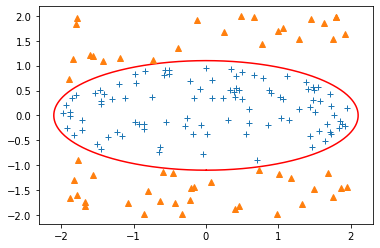

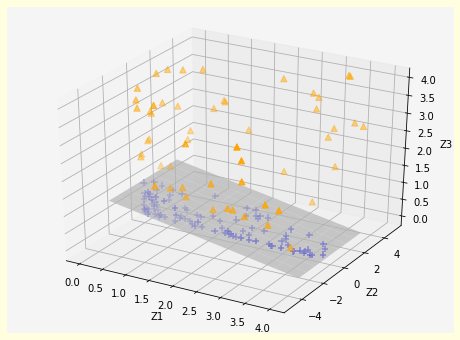

In [2]:
InnerDotNum = 100
OuterDotNum = 400
Sign = [-1,1]
# 从椭圆区域采样
x1 = np.random.rand(InnerDotNum)*2*np.random.choice(Sign,InnerDotNum)
x2 = np.sqrt(np.ones(x1.shape) - x1**2 / 4)*np.random.rand(InnerDotNum)*np.random.choice(Sign,InnerDotNum)
plt.plot(x1,x2,'+')
# 绘制椭圆区域
a=np.arange(-np.pi,np.pi,0.01)
x=2.1*np.sin(a)
y=1.1*np.cos(a)
plt.plot(x,y,color='r')
# 绘制椭圆区域之外的部分
x1_out = np.random.rand(InnerDotNum)*2*np.random.choice(Sign,InnerDotNum)
x2_out = np.random.rand(InnerDotNum)*2*np.random.choice(Sign,InnerDotNum)
idx = np.abs(x2_out)**2 + np.abs(x1_out)**2/4 > 1.3
x1_out,x2_out = x1_out[idx],x2_out[idx]
plt.plot(x1_out,x2_out,'^')
plt.savefig('basic_2d.png')
plt.show()


z1 = x1**2
z2 = np.sqrt(2)*x1*x2
z3 = x2**2
z1_out = x1_out**2
z2_out = np.sqrt(2)*x1_out*x2_out
z3_out = x2_out**2
fig = plt.figure(figsize=(8, 6),
                 facecolor='lightyellow'
                )

# 创建 3D 坐标系
ax = fig.gca(fc='whitesmoke',
             projection='3d' 
            )

ax.scatter(z1,z2,z3,marker='+', color='blue', s=40, label='Inner')
ax.scatter(z1_out,z2_out,z3_out, marker='^', color='orange', s=40, label='Outer')
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

# 可以被平面分割
x = np.linspace(0, 4, 9)
y = np.linspace(-3, 3, 9)
X, Y = np.meshgrid(x, y)
# 平面 z=-2y + 10 部分
ax.plot_surface(X=X,
                Y=Y,
                Z=-X*0.25 +1,
                color='#FFFFFF',
                alpha=0.7
               )
plt.savefig('basic_3d.png')
plt.show()

对于这一个$\phi$,可以证明映射后的内积等于映射前的内积的平方。$$<\phi(x),\phi(x')> = (<x,x'>)^2 = K(x,x') \\ K : kernel function$$
